In [2]:
import pickle

In [3]:
with open('naver_news_summary.pkl', 'rb') as file:
    data = pickle.load(file)

In [4]:
from sentence_transformers import SentenceTransformer, util

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2024-09-24 16:26:14.236582: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 16:26:14.262506: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 16:26:14.671622: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning

In [5]:
model = SentenceTransformer('snunlp/KR-SBERT-Medium-extended-klueNLItriplet_PARpair_QApair-klueSTS')

model = model.to('cuda')

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
embeddings_dict = {}

# Generating embeddings for each key in the data
for key, sentences in data.items():
    embeddings = model.encode(sentences, convert_to_numpy=True)
    embeddings_dict[key] = embeddings

embeddings_dict

{'economy': array([[ 0.4001565 ,  0.08483312,  0.03192792, ...,  0.3676643 ,
         -1.3626186 ,  1.195585  ],
        [ 0.21958265,  0.18633208, -1.1849732 , ...,  0.13311067,
         -0.23916903,  0.5973412 ],
        [-0.63049704, -0.35735807, -0.71273685, ...,  0.04515496,
          0.01305592,  0.5332277 ],
        ...,
        [ 0.36465076, -0.7494507 , -0.30302092, ...,  0.42900938,
         -1.0803306 ,  0.8367034 ],
        [-0.8725699 , -0.07559343,  0.7409698 , ...,  0.56255203,
          0.06835101, -0.5236989 ],
        [-0.38212416,  1.2928383 ,  0.57799184, ...,  0.00915645,
         -0.1823862 , -0.28687802]], dtype=float32),
 'politics': array([[-0.39005524,  0.71135795,  0.04547038, ..., -0.88800204,
          0.967386  ,  0.4270408 ],
        [-0.4745585 , -0.14922644, -0.25736898, ...,  0.71276885,
          0.345043  ,  0.29253796],
        [-0.21345001,  0.75571156, -0.44063383, ...,  0.9450081 ,
          0.83111393, -0.49219665],
        ...,
        [-0.0325

In [8]:
avg_topic_vec = {}

for key in embeddings_dict.keys():
    mean = np.mean(embeddings_dict[key], axis=0)

    avg_topic_vec[key] = mean

avg_topic_vec

{'economy': array([-1.96541846e-01,  6.09926432e-02, -5.41342162e-02, -1.25453323e-01,
         1.34863719e-01,  1.50130019e-01, -6.96189993e-04,  1.79824382e-01,
        -7.86031224e-03,  1.60549268e-01, -1.74180970e-01,  3.12334169e-02,
         3.53915721e-01, -2.14917108e-01,  1.62573636e-01, -1.08534388e-01,
        -1.75220773e-01,  1.48786142e-01,  1.48652956e-01, -4.71565247e-01,
        -1.64033785e-01, -2.22515717e-01, -1.03914499e-01, -4.22527567e-02,
        -3.36709738e-01,  4.16638494e-01,  4.46859479e-01,  1.31274715e-01,
         4.20973375e-02,  3.42425667e-02,  1.19313531e-01,  2.46292517e-01,
         1.36239231e-01,  1.31120324e-01,  1.94743887e-01,  6.43383086e-01,
         8.35783705e-02, -1.39431790e-01,  1.09750815e-01, -2.19191667e-02,
         2.94255376e-01,  8.71998593e-02, -1.65991351e-01,  2.56845914e-02,
        -1.09585188e-01, -5.39636500e-02, -2.88505197e-01,  2.90547907e-01,
        -3.98464985e-02,  1.71618606e-03, -5.69203272e-02,  1.24027081e-01,
 

In [9]:
with open('data1.pkl', 'rb') as file:
    data = pickle.load(file)

data[:10]

[['헐! 나 이벤트에 당첨 됐어.', '5'],
 ['내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.', '5'],
 ['한 명 뽑는 거였는데, 그게 바로 내가 된 거야.', '5'],
 ['당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. 그래서 못 산 향수야.', '5'],
 ['에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.', '4'],
 ['난 부페 형식의 음식들도 정말 좋아해. 그 것도 좀 알려 줘.', '4'],
 ['응. 완전히 끝난 거야. 한 달 동안 주말에 쉬지도 못하고 일만 했거든.', '5'],
 ['신나는 음악 듣는 것도 좋고, 어디 여행 가고 싶고 이 것 저 것 다 해보고 싶어.', '5'],
 ['친구들도 내 연락 기다리고 있을 텐데 내가 까먹고 있었네?', '5'],
 ['그래. 일단은 친구들부터 만나서 여행 계획에 대해서 얘기 좀 해봐야 되겠어.', '5']]

In [10]:
emotion_mapping = {
    '0': 'fear',
    '1': 'surprise',
    '2': 'angry',
    '3': 'sadness',
    '4': 'neutral',
    '5': 'happiness',
    '6': 'disgust'
}

# 각 데이터를 감정 레이블로 변환하는 코드
updated_data = [[sentence, emotion_mapping[label]] for sentence, label in data]

updated_data[:10]

[['헐! 나 이벤트에 당첨 됐어.', 'happiness'],
 ['내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.', 'happiness'],
 ['한 명 뽑는 거였는데, 그게 바로 내가 된 거야.', 'happiness'],
 ['당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. 그래서 못 산 향수야.', 'happiness'],
 ['에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.', 'neutral'],
 ['난 부페 형식의 음식들도 정말 좋아해. 그 것도 좀 알려 줘.', 'neutral'],
 ['응. 완전히 끝난 거야. 한 달 동안 주말에 쉬지도 못하고 일만 했거든.', 'happiness'],
 ['신나는 음악 듣는 것도 좋고, 어디 여행 가고 싶고 이 것 저 것 다 해보고 싶어.', 'happiness'],
 ['친구들도 내 연락 기다리고 있을 텐데 내가 까먹고 있었네?', 'happiness'],
 ['그래. 일단은 친구들부터 만나서 여행 계획에 대해서 얘기 좀 해봐야 되겠어.', 'happiness']]

In [11]:
senti_dict = {}
senti_dict['fear'] = []
senti_dict['surprise'] = []
senti_dict['angry'] = []
senti_dict['sadness'] = []
senti_dict['neutral'] = []
senti_dict['happiness'] = []
senti_dict['disgust'] = []

for data in updated_data:
    senti    = data[1]
    sentence = data[0]

    senti_dict[senti].append(sentence)


senti_dict

{'fear': ['나 아무래도 혼자 갇힌 것 같애.',
  '자고 일어났더니 온 마을이 다 물바다야. 나 혼자 있어. 무서워.',
  '내가 잠이 들면 업어가도 몰라. 그래서 재난 문자랑 피하라는 전화도 못 받고, 그냥 잠만 자고 있었나 봐.',
  '우리 집 주위에 다 물로 차 있어. 나갈 수가 없어.',
  '내 몸은 괜찮아. 다친 덴 없어. 그리고 우리 집까진 아직 들어오지 않았어.',
  '나 아무래도 갇힌 거 같아!',
  '잠을 자고 일어났는데 나 혼자 집 안에 갇힌 거 같아. 너무 무서워.',
  '집 밖을 살펴봤는데, 집 주변까지 물이 차올라서, 밖으로 나갈 수 있는 상황이 아니야.',
  '다행히 집 안에까지는 물이 들어오지 않았어. 몸도 괜찮지만 혼자 있는 거 자체가 너무 무섭고 두려워.',
  '나 아무래도 혼자 갇힌 것 같아.',
  '자고 일어났더니 우리 동네가 다 물바다야.',
  '내가 자느라고 재난문자랑 대피전화를 받지를 못했어. 그래서 나만 혼자 갇혀있는 거야.',
  '어. 우리집 주변이 다 물바다야. 밖으로 나갈 수가 없어.',
  '집안까지 물은 들어오지 않았지만 나갈 수 있는 통로가 다 막혀버렸어. 그리고 난 괜찮아. 기분이 조금 우울하긴 하지만.',
  '나 혼자 갇히게 된 거 같아.',
  '내가 잠을 자고 있는 동안에 비가 너무나 많이 와서 우리 동네가 홍수 피해지역이 됐대. 나 고립 된 거 같아.',
  '아직까지는 집 안에 물이 들어오지 않았어. 하지만 언제 물이 들어올까봐 너무 무섭고 걱정돼.',
  '아직까지는 물이 집 안으로 들어오지 않았는데, 물이 조만간 들어올까봐 너무 걱정 돼.',
  '나 아무래도 갇힌 것 같애.',
  '나 갇히게 된 거 같아!',
  '나 혼자 집에 갇힌 것 같아. 너무 무서워.',
  '집에서 자고 일어났는데 바깥이 물난리야! 물이 엄청 많이 차올랐어!',
  '나갈 수가 없어. 바깥에 물이 잔뜩 고여 있어. 차들도 물에 잠겨있는 거 같아. 둥둥 떠 있어.',
  '요즘 장마에 

In [12]:
senti_embeddings_dict = {}

# Generating embeddings for each key in the data
for key, sentences in senti_dict.items():
    embeddings = model.encode(sentences, convert_to_numpy=True)
    senti_embeddings_dict[key] = embeddings

senti_embeddings_dict

{'fear': array([[-0.85793036,  0.10487752,  0.44373557, ..., -1.8258815 ,
          0.397859  , -0.45494774],
        [-0.27369732, -0.3995116 ,  0.8754595 , ..., -1.0342296 ,
         -0.08951657, -0.8233887 ],
        [-0.83238614,  0.6488759 , -0.31649745, ..., -0.2748371 ,
         -0.0055877 , -0.8996122 ],
        ...,
        [-0.11474324,  1.8870729 , -0.8739809 , ..., -0.35606658,
          1.1549404 ,  0.62760216],
        [-0.06378838,  0.629473  ,  0.63767487, ..., -0.9382383 ,
          0.18579751,  0.3771675 ],
        [-0.2671664 , -0.6309835 , -0.42914814, ..., -0.6005644 ,
          0.4312099 , -0.1254156 ]], dtype=float32),
 'surprise': array([[-0.38185695,  0.49625403,  0.12017965, ...,  0.29822734,
         -0.63343334,  0.27509323],
        [ 0.33775318,  1.248011  ,  0.20868903, ...,  0.35445765,
          0.3451778 , -0.6149704 ],
        [ 0.5728179 ,  0.3295774 ,  0.23149756, ..., -0.6925386 ,
         -1.094522  ,  0.34744322],
        ...,
        [-0.0153077

In [13]:
avg_senti_vec = {}

for key in senti_embeddings_dict.keys():
    mean = np.mean(senti_embeddings_dict[key], axis=0)

    avg_senti_vec[key] = mean

avg_senti_vec

{'fear': array([-3.91801745e-01,  2.61615098e-01,  3.52376997e-02,  2.19814286e-01,
        -2.19239339e-01, -4.98993509e-02, -4.94934380e-01, -1.50600433e-01,
        -2.54254222e-01,  1.40322387e-01,  4.51797917e-02,  6.27902508e-01,
        -5.89118823e-02,  2.15118214e-01, -1.09541349e-01,  2.28036255e-01,
         3.41451094e-02,  3.67662251e-01, -2.92532057e-01,  4.92135525e-01,
        -1.47497371e-01, -3.08880508e-01,  2.77711779e-01, -3.90450180e-01,
        -3.41455042e-01,  3.45072836e-01,  2.30603218e-01,  7.46903867e-02,
         2.86564738e-01, -4.79768038e-01, -9.71782058e-02, -5.87620914e-01,
         1.38062850e-01,  1.85679421e-01,  2.92518377e-01, -1.45692080e-01,
         5.81435323e-01,  4.85042125e-01, -1.70002416e-01, -9.75987136e-01,
         2.72682250e-01, -6.55773580e-01,  3.44692618e-01,  1.29878679e-02,
         3.99480730e-01,  4.33888495e-01, -1.24948315e-01, -3.33243698e-01,
        -5.36729023e-02, -9.16439444e-02, -2.21712142e-02,  4.69913423e-01,
    

In [14]:
import pickle

with open('avg_topic_vec.pkl', 'wb') as file1, \
    open('avg_senti_vec.pkl', 'wb') as file2:
    pickle.dump(avg_topic_vec, file1)
    pickle.dump(avg_senti_vec, file2)

In [15]:
for keys in avg_topic_vec.keys():
    print(keys)

print()

for keys in avg_senti_vec.keys():
    print(keys)

economy
politics
international
science
social
culture

fear
surprise
angry
sadness
neutral
happiness
disgust


In [16]:
topic_embedds = []
senti_embedds = []

for keys in avg_topic_vec.keys():
    topic_embedds.append(avg_topic_vec[keys])

for keys in avg_senti_vec.keys():
    senti_embedds.append(avg_senti_vec[keys])

similarities = model.similarity(topic_embedds, senti_embedds)

similarities

/usr/local/lib/python3.10/dist-packages/sentence_transformers/util.py:33: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  a = torch.tensor(a)


tensor([[0.1491, 0.2038, 0.2097, 0.3779, 0.1707, 0.2668, 0.1868],
        [0.1258, 0.1663, 0.2044, 0.1678, 0.1942, 0.1666, 0.2279],
        [0.0692, 0.1483, 0.1070, 0.1917, 0.1293, 0.1826, 0.0931],
        [0.1448, 0.1919, 0.2117, 0.3188, 0.1375, 0.2897, 0.1957],
        [0.1914, 0.2661, 0.2450, 0.2580, 0.3656, 0.2458, 0.3050],
        [0.1642, 0.3188, 0.2702, 0.2853, 0.2881, 0.2894, 0.2696]])

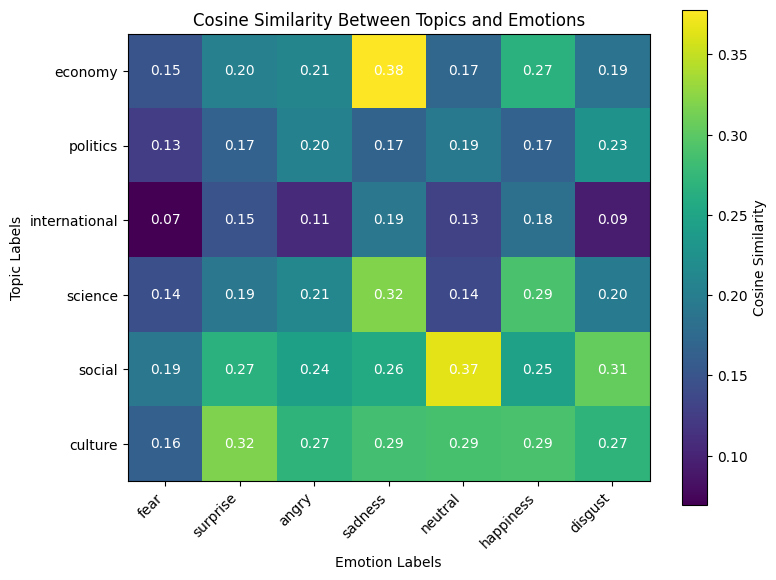

In [17]:
y_labels = ['economy', 'politics', 'international', 'science', 'social', 'culture']
x_labels = ['fear', 'surprise', 'angry', 'sadness', 'neutral', 'happiness', 'disgust']


plt.figure(figsize=(8, 6))
plt.imshow(similarities, cmap='viridis', interpolation='nearest')

for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        plt.text(j, i, f'{similarities[i, j]:.2f}', ha='center', va='center', color='white')

plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(y_labels)), labels=y_labels)

# 컬러바 및 제목 설정
plt.colorbar(label='Cosine Similarity')
plt.title('Cosine Similarity Between Topics and Emotions')
plt.xlabel('Emotion Labels')
plt.ylabel('Topic Labels')
plt.tight_layout()  # 레이블이 잘리지 않도록 레이아웃 조정
plt.show()